## Statystyka matematyczna I {-}

- Praca domowa 2

- Uladzislau Darhevich 108519

### Zadanie 1 {-}

Trzeba wyznaczyć estymator największej wiarygodności dla rożkładu wykładniczego:
$$X_1, X_2, ... X_n \sim  \text{Ex}(\theta)$$ 

$$ENW(\theta) = ?$$

Gęstość prawdopodobieństwa:

$f(x) = \left\{ \begin{array}{cl}
\theta e^{-\theta x} & : \ x \geq 0 \\
0 & : \ x < 0
\end{array} \right.$

Wtedy

$$L(\theta, X_1, X_2, ...X_n) = \theta e^{-\theta x_1} \cdot \theta e^{-\theta x_2}\cdot ...\cdot \theta e^{-\theta x_n}$$

$$L(\theta, X_1, X_2, ...X_n) = \theta ^n\cdot exp(-\theta\sum\limits_{i=1}^{n}x_i)$$

$$\ln L(\theta, X_1, X_2, ...X_n) = n\ln\theta-\theta \sum\limits_{i=1}^{n}x_i$$

Możemy przekształcić to wyrażenie i otrzymujemy

$$\frac{d }{d\theta}\ln L(\theta, X_1, X_2, ...X_n) = 0$$

$$\frac{d }{d\theta}(n\ln\theta-\theta \sum\limits_{i=1}^{n}x_i)=\frac{n}{\theta}-\sum\limits_{i=1}^{n}x_i = 0$$

$$\theta = \frac{n}{\sum\limits_{i=1}^{n}x_i}$$

Zatem estymator jest odwrotnością średniej z próby.

$$ENW(\theta) = \frac{1}{\overline{x}}$$



### Zadanie 2 {-}


$$\mathbb{E}X = \frac{1}{\theta}, \text{Var}X = \frac{1}{\theta^2}, b(\theta) = ?$$

Estymator nie jest obciążony.

$$b(\theta) = \frac{\theta}{n-1}$$

$$R(\theta) = \text{Var} T + b^2(\theta) = \frac{1}{\theta^2} + \frac{\theta^2}{(n-1)^2}$$

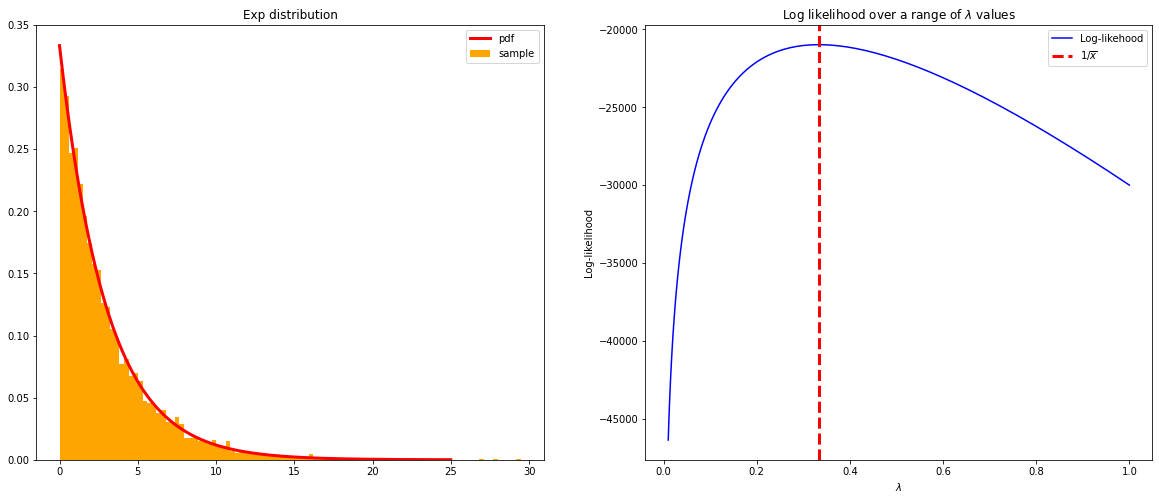

In [78]:
import numpy as np
from scipy.stats import expon
import matplotlib.pyplot as plt

scale = 3
sample_size = 10_000

dist =  np.random.exponential(scale, sample_size)
h = 1/np.mean(dist)
lambda_array = np.geomspace(0.01, 1, 100)
LL = []
for L in lambda_array:
    loglik = np.log(L)-L*dist
    LL.append(loglik.sum())

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

xs = np.arange(0, 25, 0.001)
ys = expon.pdf(xs, scale=scale)
ax1.plot(xs, ys, label='pdf', lw=3, color='red')
ax1.hist(dist, density=True, label='sample', bins=100, color='orange')
ax1.set_title('Exp distribution')
ax1.legend()

ax2.plot(lambda_array, LL, color='blue', label='Log-likehood')
ax2.axvline(h, color="red", linestyle='--', lw=3, label="$1/{\overline{x}}$")
ax2.set_title('Log likelihood over a range of $\lambda$ values')
ax2.set_xlabel('$\lambda$')
ax2.set_ylabel('Log-likelihood')
ax2.legend()

plt.show()